# Exploratory data analysis of churn data

This data is based on employees of a bank. It contains the information whether a person will leave / resign from the bank. 

## Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msg

## Read the churn data set

In [2]:
data = pd.read_csv("./Churn_Modelling.csv")

In [3]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Basic information about the dataset

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


**Observations-1:**

1. The data set contains no null values
2. There are total 14 columns and 10000 rows in the dataset

## Univariate analysis

### RowNumber

In [5]:
data['RowNumber'].nunique()

10000

The rownumber is unique for all the rows. Which means it is not an important feature.

### CustomerId

In [6]:
data['CustomerId'].nunique()

10000

The customerId is also not a good predictor because it is unique for all the rows.

### Surname

In [7]:
data['Surname']

0        Hargrave
1            Hill
2            Onio
3            Boni
4        Mitchell
          ...    
9995     Obijiaku
9996    Johnstone
9997          Liu
9998    Sabbatini
9999       Walker
Name: Surname, Length: 10000, dtype: object

Surname is also not an useful feature for this particular case.

### CreditScore

In [8]:
data['CreditScore']

0       619
1       608
2       502
3       699
4       850
       ... 
9995    771
9996    516
9997    709
9998    772
9999    792
Name: CreditScore, Length: 10000, dtype: int64

The minimum and maximum of the CreditScore

In [9]:
data['CreditScore'].min() , data['CreditScore'].max()

(350, 850)

The mean, median and standard deviation of the data

In [10]:
data['CreditScore'].mean()

650.5288

In [11]:
data['CreditScore'].median()

652.0

In [12]:
data['CreditScore'].std()

96.65329873613061

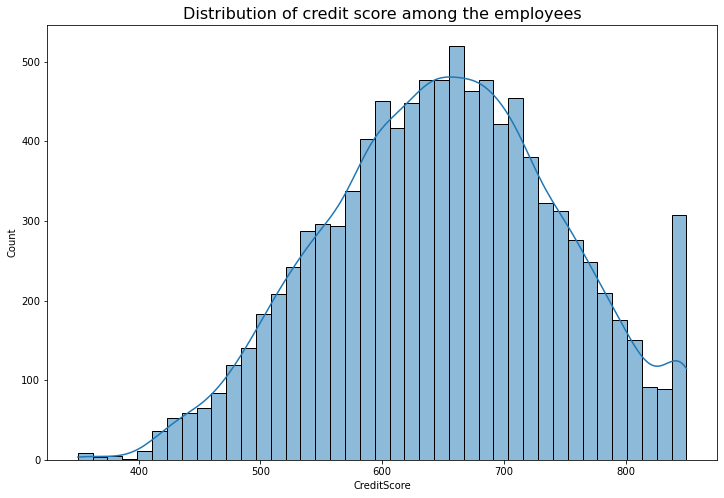

In [14]:
plt.figure(figsize=(12,8))
sns.histplot(data=data, x=data['CreditScore'], kde=True)
plt.title("Distribution of credit score among the employees", fontsize=16)
plt.show()

Most people has Credit score around 650 (i.e. witin 570 - 730)

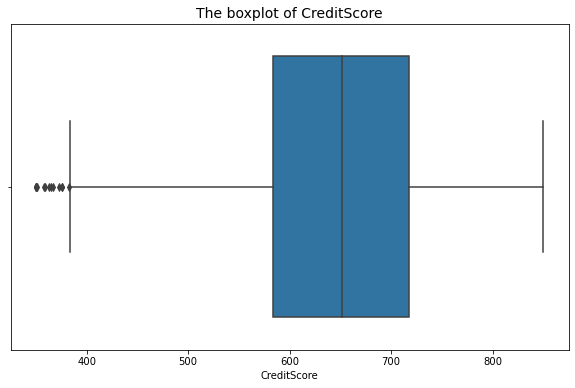

In [16]:
plt.figure(figsize=(10,6))
sns.boxplot(data=data, x='CreditScore')
plt.title("The boxplot of CreditScore", fontsize=14)
plt.show()

**Code for Tukey's method of outlier detection and boxplot**

In [19]:
Q1, Q3 = np.quantile(data['CreditScore'], q=[0.25, 0.75])

In [20]:
Q1

584.0

In [21]:
Q3

718.0

In [22]:
IQR = Q3 - Q1

In [23]:
IQR

134.0

In [24]:
L = Q1 - 1.5*IQR

In [25]:
M = Q3 + 1.5*IQR

In [26]:
L, M

(383.0, 919.0)

In [27]:
data['CreditScore'].min(), data['CreditScore'].max()

(350, 850)

In [28]:
data['CreditScore'].min() < L

True

i.e. our bottom whisker will be at L (383)

In [32]:
print(f"The bottom outliers are: {data[data['CreditScore']<L]['CreditScore'].unique()}")

The bottom outliers are: [376 363 359 350 358 351 365 367 382 373]


In [31]:
data['CreditScore'].max() > M

False

There are no top outliers

In [33]:
def tukeys_method(values):
    Q1, Q3 = np.quantile(values, q=[0.25, 0.75])
    IQR = Q3 - Q1
    L = Q1 - 1.5*IQR
    M = Q3 + 1.5*IQR
    minimum = values.min()
    maximum = values.max()
    if minimum < L:
        Wb = L
        bottom_outliers = values[values < L]
    else:
        Wb = minimum
        bottom_outliers = None
    if maximum > M:
        Wt = M
        top_outliers = values[values > M]
    else:
        Wt = maximum
        top_outliers = None
    return Wb, Wt, bottom_outliers, top_outliers

In [35]:
tukeys_method(data['CreditScore'].values)

(383.0,
 850,
 array([376, 376, 363, 359, 350, 350, 358, 351, 365, 367, 350, 350, 382,
        373, 350], dtype=int64),
 None)

### Geography

In [36]:
data['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [37]:
data['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

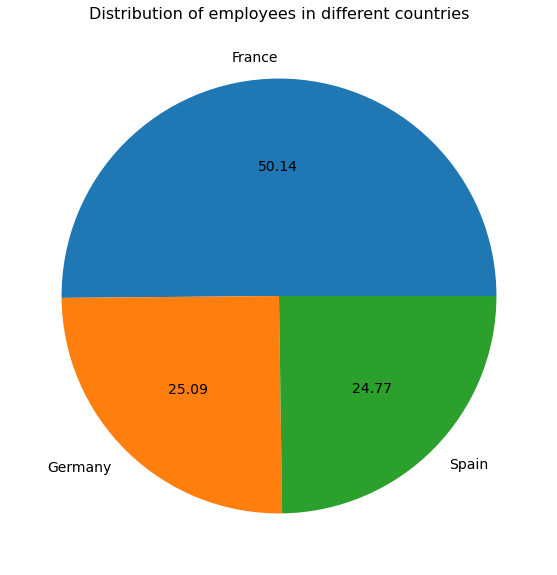

In [40]:
plt.figure(figsize=(10,10))
wedges, labels, pcts = plt.pie(x = data['Geography'].value_counts().values, labels = data['Geography'].value_counts().index, autopct="%.2f")
for l in labels:
    l.set_fontsize(14)
for p in pcts:
    p.set_fontsize(14)
plt.title("Distribution of employees in different countries", fontsize=16)
plt.show()

In [43]:
dummy_geography = pd.get_dummies(data['Geography'])

In [49]:
pd.concat([data['Geography'], dummy_geography], axis = 1)

,Geography,France,Germany,Spain
0,France,1,0,0
1,Spain,0,0,1
2,France,1,0,0
3,France,1,0,0
4,Spain,0,0,1
...,...,...,...,...
9995,France,1,0,0
9996,France,1,0,0
9997,France,1,0,0
9998,Germany,0,1,0


In [50]:
dummy_geography_2 = pd.get_dummies(data['Geography'], drop_first=True)

In [51]:
pd.concat([data['Geography'], dummy_geography_2], axis = 1)

,Geography,Germany,Spain
0,France,0,0
1,Spain,0,1
2,France,0,0
3,France,0,0
4,Spain,0,1
...,...,...,...
9995,France,0,0
9996,France,0,0
9997,France,0,0
9998,Germany,1,0


### Age

In [52]:
data['Age']

0       42
1       41
2       42
3       39
4       43
        ..
9995    39
9996    35
9997    36
9998    42
9999    28
Name: Age, Length: 10000, dtype: int64

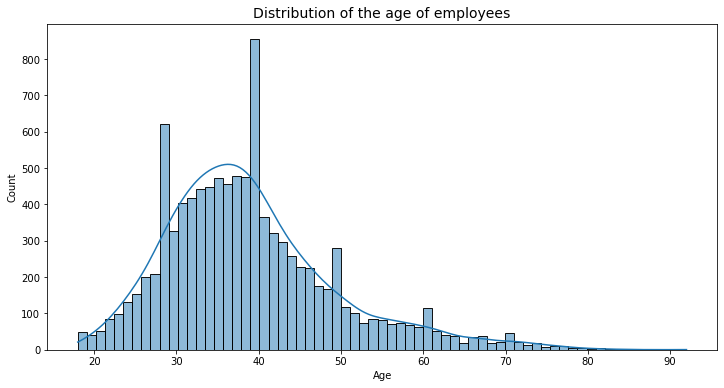

In [53]:
plt.figure(figsize=(12,6))
sns.histplot(data = data, x = 'Age', kde = True)
plt.title("Distribution of the age of employees", fontsize=14)
plt.show()

In [55]:
data['Age'].mean()

38.9218

In [56]:
data['Age'].median()

37.0

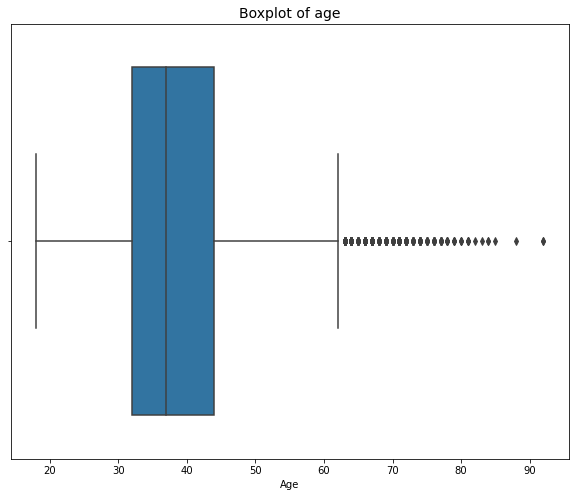

In [57]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=data, x='Age')
plt.title("Boxplot of age", fontsize=14)
plt.show()

In [58]:
tukeys_method(data['Age'].values)

(18,
 62.0,
 None,
 array([66, 75, 65, 73, 65, 72, 67, 67, 79, 80, 68, 75, 66, 66, 70, 63, 72,
        64, 64, 70, 67, 82, 63, 69, 65, 69, 64, 65, 74, 67, 66, 67, 63, 70,
        71, 72, 67, 74, 76, 66, 63, 66, 68, 67, 63, 71, 66, 69, 73, 65, 66,
        64, 69, 64, 77, 74, 65, 70, 67, 69, 67, 74, 69, 74, 74, 64, 63, 63,
        70, 74, 65, 72, 77, 66, 65, 74, 88, 63, 71, 63, 64, 67, 70, 68, 72,
        71, 66, 75, 67, 73, 69, 76, 63, 85, 67, 74, 76, 66, 69, 66, 72, 63,
        71, 63, 74, 67, 72, 72, 66, 84, 71, 66, 63, 74, 69, 84, 67, 64, 68,
        66, 77, 70, 67, 79, 67, 76, 73, 66, 67, 64, 73, 76, 72, 64, 71, 63,
        70, 65, 66, 65, 80, 66, 63, 63, 63, 63, 66, 74, 69, 63, 64, 76, 75,
        68, 69, 77, 64, 66, 74, 71, 67, 68, 64, 68, 70, 64, 75, 66, 64, 78,
        65, 74, 64, 64, 71, 77, 79, 70, 81, 64, 68, 68, 63, 79, 66, 64, 70,
        69, 71, 72, 66, 68, 63, 71, 72, 72, 64, 78, 75, 65, 65, 67, 63, 68,
        71, 73, 64, 66, 71, 69, 71, 66, 76, 69, 73, 64, 64, 75, 73, 7

In [59]:
data['Age'].max(), data['Age'].min()

(92, 18)

In [67]:
def min_max_scaling(values):
    minimum = values.min()
    maximum = values.max()
    return ((values - minimum) / (maximum - minimum))

In [68]:
age_scaled_1 = min_max_scaling(data['Age'].values)

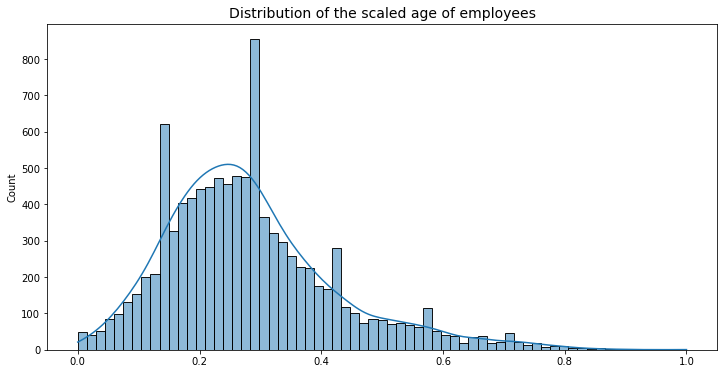

In [69]:
plt.figure(figsize=(12,6))
sns.histplot(x = age_scaled_1, kde = True)
plt.title("Distribution of the scaled age of employees", fontsize=14)
plt.show()

In [70]:
credit_score_scaled_1 = min_max_scaling(data['CreditScore'].values)

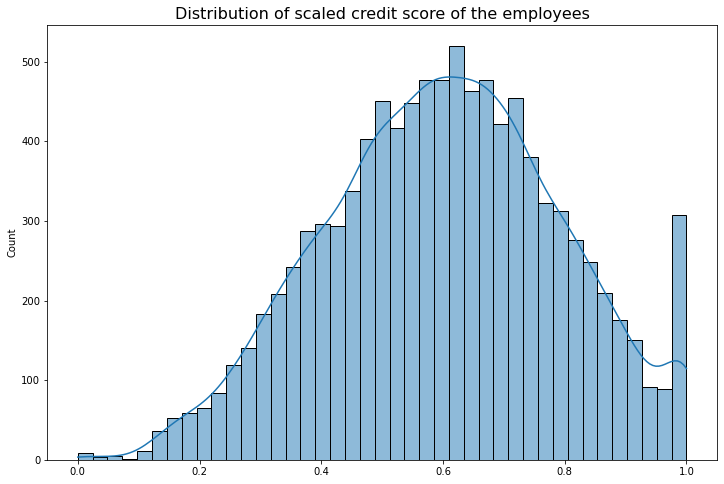

In [71]:
plt.figure(figsize=(12,8))
sns.histplot(x=credit_score_scaled_1, kde=True)
plt.title("Distribution of scaled credit score of the employees", fontsize=16)
plt.show()

In [72]:
def standard_scaler(values):
    mean = values.mean()
    std = values.std()
    return (values - mean) / std

In [73]:
age_scaled_2 = standard_scaler(data['Age'].values)

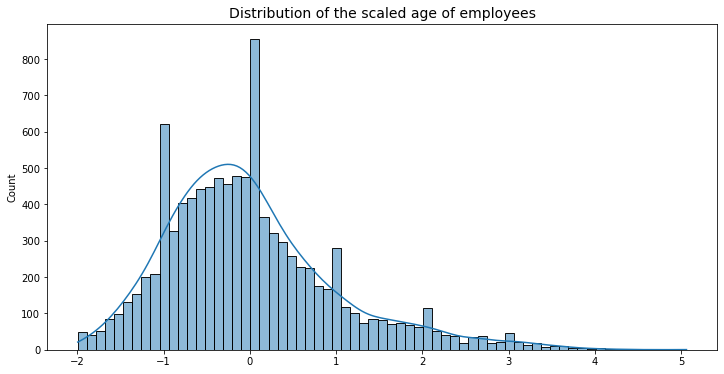

In [74]:
plt.figure(figsize=(12,6))
sns.histplot(x = age_scaled_2, kde = True)
plt.title("Distribution of the scaled age of employees", fontsize=14)
plt.show()

In [75]:
credit_score_scaled_2 = standard_scaler(data['CreditScore'].values)

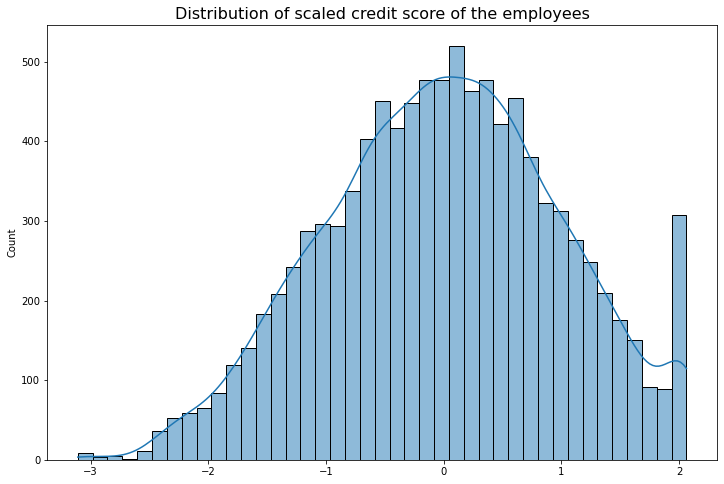

In [76]:
plt.figure(figsize=(12,8))
sns.histplot(x=credit_score_scaled_2, kde=True)
plt.title("Distribution of scaled credit score of the employees", fontsize=16)
plt.show()

In [77]:
from sklearn.preprocessing import StandardScaler, minmax_scale

In [79]:
scaler = StandardScaler()

In [81]:
scaler.fit_transform(data['Age'].values.reshape(-1,1))

array([[ 0.29351742],
       [ 0.19816383],
       [ 0.29351742],
       ...,
       [-0.27860412],
       [ 0.29351742],
       [-1.04143285]])

In [83]:
min_max_scale = minmax_scale(data['Age'].values)

In [84]:
min_max_scale

array([0.32432432, 0.31081081, 0.32432432, ..., 0.24324324, 0.32432432,
       0.13513514])

### Tenure

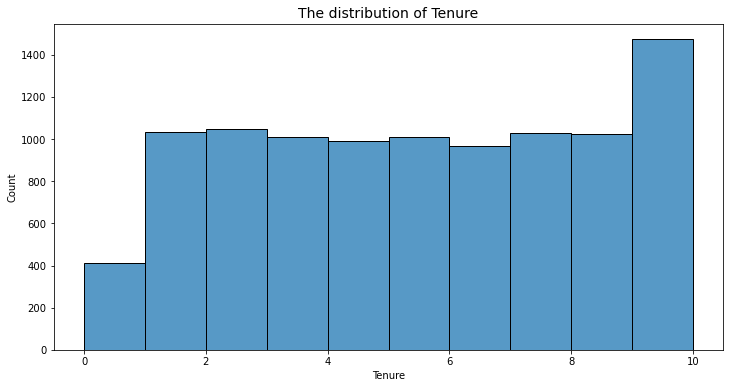

In [90]:
plt.figure(figsize=(12,6))
sns.histplot(data['Tenure'], kde=False, bins=10)
plt.title("The distribution of Tenure", fontsize=14)
plt.show()

In [88]:
data['Tenure'].unique()

array([ 2,  1,  8,  7,  4,  6,  3, 10,  5,  9,  0], dtype=int64)

### Balance

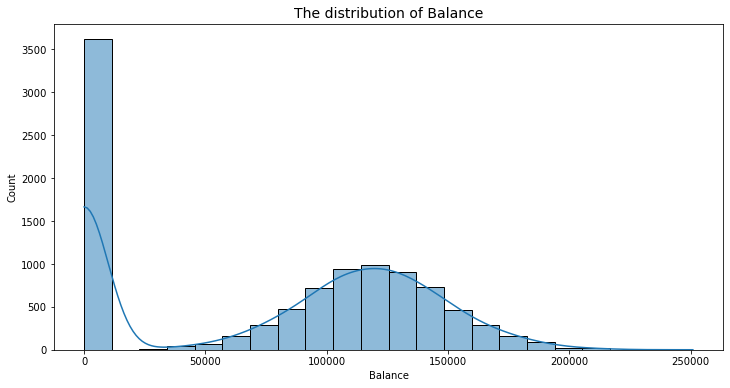

In [93]:
plt.figure(figsize=(12,6))
sns.histplot(data['Balance'], kde=True)
plt.title("The distribution of Balance", fontsize=14)
plt.show()

In [94]:
balanced_scale_1 = min_max_scaling(data['Balance'].values)

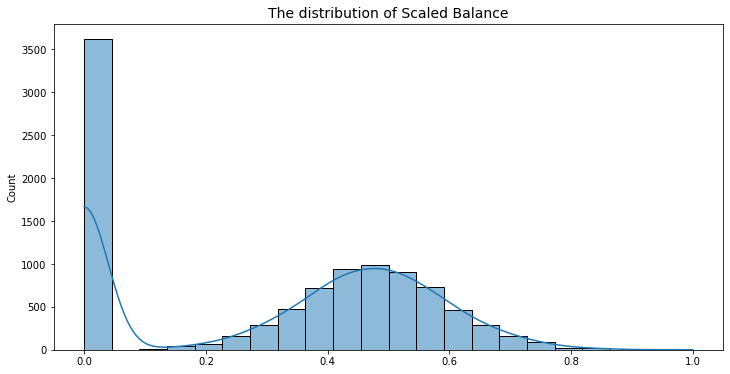

In [95]:
plt.figure(figsize=(12,6))
sns.histplot(x=balanced_scale_1, kde=True)
plt.title("The distribution of Scaled Balance", fontsize=14)
plt.show()

In [96]:
data['NumOfProducts'].unique()

array([1, 3, 2, 4], dtype=int64)

In [97]:
data['IsActiveMember'].unique()

array([1, 0], dtype=int64)

In [99]:
data['HasCrCard'].unique()

array([1, 0], dtype=int64)

In [100]:
data['EstimatedSalary']

0       101348.88
1       112542.58
2       113931.57
3        93826.63
4        79084.10
          ...    
9995     96270.64
9996    101699.77
9997     42085.58
9998     92888.52
9999     38190.78
Name: EstimatedSalary, Length: 10000, dtype: float64

In [101]:
data['Exited'].unique()

array([1, 0], dtype=int64)

## Bivariate Analysis

### CreditScore vs EstimatedSalary

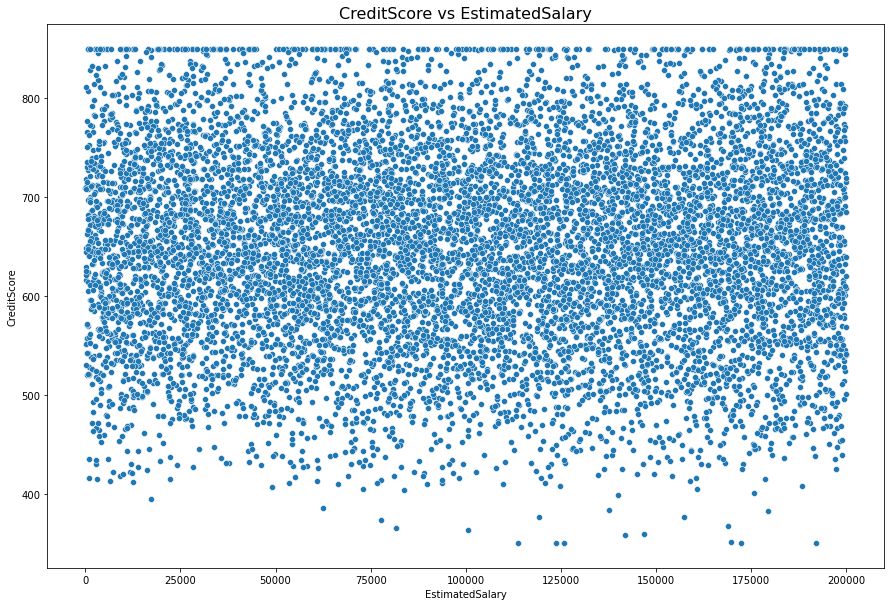

In [102]:
plt.figure(figsize = (15, 10))
sns.scatterplot(x = 'EstimatedSalary', y = 'CreditScore', data = data)
plt.title("CreditScore vs EstimatedSalary", fontsize=16)
plt.show()

Observation: Credit Score doesn't depend on Estimated Salary

### CreditScore vs Age

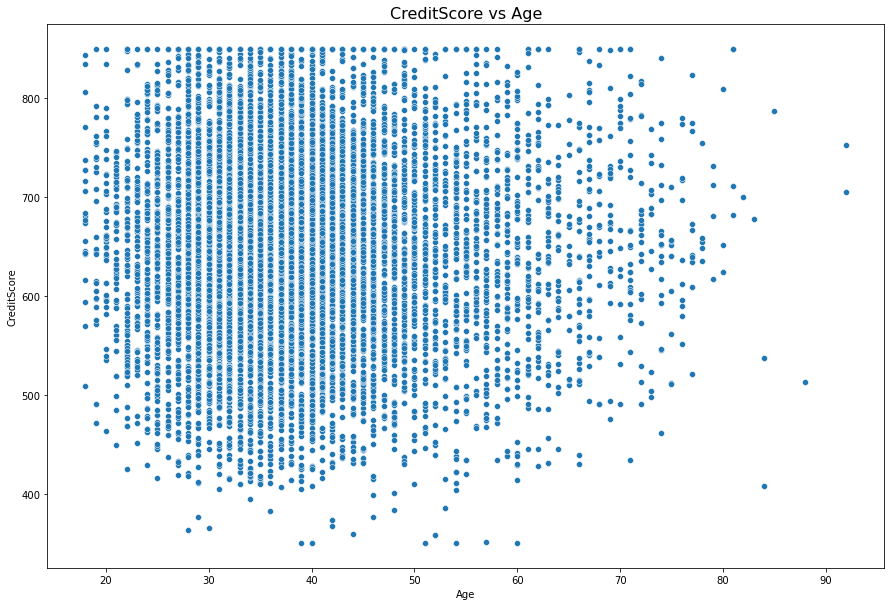

In [103]:
plt.figure(figsize = (15, 10))
sns.scatterplot(x = 'Age', y = 'CreditScore', data = data)
plt.title("CreditScore vs Age", fontsize=16)
plt.show()

Credit Score doesn't depend on Age

### EstimatedSalary vs Age

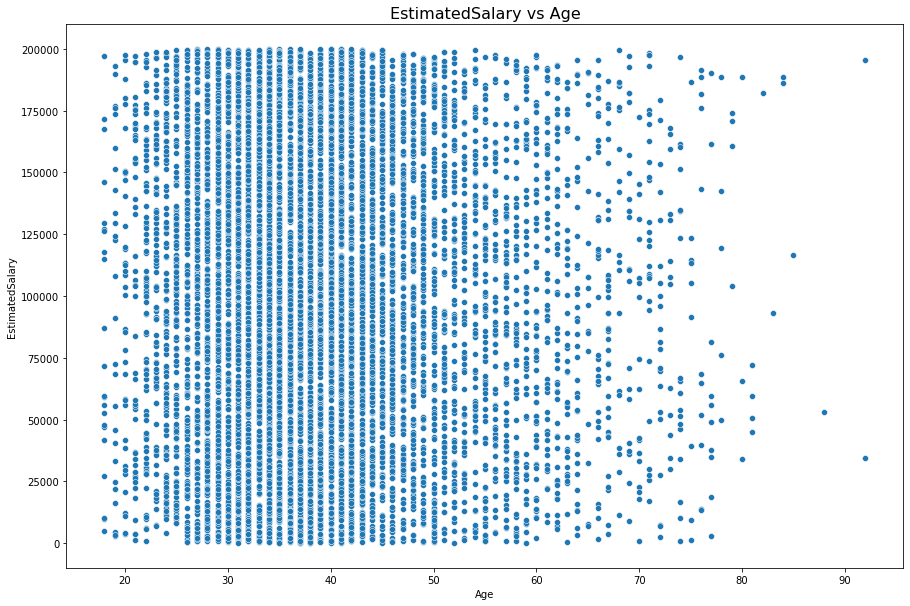

In [104]:
plt.figure(figsize = (15, 10))
sns.scatterplot(x = 'Age', y = 'EstimatedSalary', data = data)
plt.title("EstimatedSalary vs Age", fontsize=16)
plt.show()

EstimatedSalary doesn't depend on Age